In [29]:
import torch
import torch.utils
import torchvision
import torchvision.transforms as transforms

In [30]:
import torch.utils.data


transform_compose = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

train_set = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_compose)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_compose)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


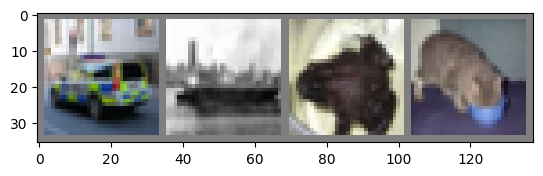

car   ship  frog  cat  


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# img here is a tensor
def imgshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imgshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [32]:
from torch import nn

class MyFirstNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forward(self, X):
        X = self.flatten(X)
        activations = self.linear_relu_stack(X)
        return activations

In [33]:
model = MyFirstNeuralNetwork()
print(model)

MyFirstNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [34]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param}")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: Parameter containing:
tensor([[-0.0260,  0.0174,  0.0269,  ..., -0.0058,  0.0208, -0.0186],
        [-0.0118, -0.0135,  0.0290,  ...,  0.0235,  0.0136, -0.0294],
        [-0.0340,  0.0115,  0.0074,  ...,  0.0005,  0.0223,  0.0017],
        ...,
        [-0.0022,  0.0145, -0.0227,  ...,  0.0342,  0.0264, -0.0343],
        [ 0.0350, -0.0250,  0.0146,  ...,  0.0248, -0.0303, -0.0278],
        [ 0.0085, -0.0276,  0.0046,  ..., -0.0157, -0.0332,  0.0321]],
       requires_grad=True)
Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: Parameter containing:
tensor([-1.9271e-02,  5.7390e-03, -2.5112e-02,  8.3101e-03,  2.4403e-02,
         1.5134e-02, -2.3676e-02,  1.8090e-03, -1.1521e-02,  2.7051e-02,
         4.4083e-03,  3.4689e-02,  2.8101e-02, -4.4718e-03, -2.4400e-02,
        -1.8295e-02,  1.5032e-03,  2.2382e-02, -2.8557e-02,  2.7588e-02,
        -2.6700e-02, -3.4609e-02, -4.5438e-03,  3.2980e-02, 

In [35]:
class MyFirstCCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.conv_layers = nn.Sequential(
            # Conv Layer 1
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            # Conv. Layer 2
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
            nn.ReLU(),
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.flatten(x)
        x = self.fc_layers(x)
        return x

In [36]:
cnn_model = MyFirstCCN()
print(cnn_model)

MyFirstCCN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

In [38]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.261
[1,  4000] loss: 2.072
[1,  6000] loss: 1.786
[1,  8000] loss: 1.630
[1, 10000] loss: 1.532
[1, 12000] loss: 1.491
[2,  2000] loss: 1.427
[2,  4000] loss: 1.410
[2,  6000] loss: 1.371
[2,  8000] loss: 1.352
[2, 10000] loss: 1.325
[2, 12000] loss: 1.311
[3,  2000] loss: 1.256
[3,  4000] loss: 1.239
[3,  6000] loss: 1.215
[3,  8000] loss: 1.206
[3, 10000] loss: 1.210
[3, 12000] loss: 1.213
Finished Training


In [39]:
PATH = "./cifar_net.pth"

torch.save(cnn_model.state_dict(), PATH)

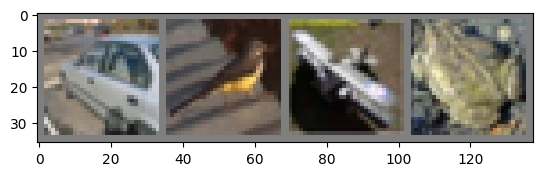

True Labels:  ['car', 'bird', 'plane', 'frog']


In [40]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

imgshow(torchvision.utils.make_grid(images))

true_labels = list(map(lambda label_num: classes[label_num], labels))

print("True Labels: ", true_labels)


In [41]:
trained_model = MyFirstCCN()
trained_model.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [42]:
outputs = trained_model(images)

In [43]:
print(outputs)

tensor([[2.0770, 1.5032, 0.8363, 1.1451, 1.0067, 0.5625, 0.0000, 1.0634, 2.7832,
         1.2912],
        [2.8249, 0.7176, 2.5714, 0.9192, 2.3858, 0.0000, 0.0780, 1.1380, 1.5454,
         0.8747],
        [5.2545, 1.6173, 2.1660, 0.6066, 1.7018, 0.0000, 0.6789, 0.4431, 3.3437,
         1.9030],
        [0.9834, 4.2332, 1.4341, 2.2846, 1.1272, 0.7087, 4.3497, 0.0000, 1.9577,
         3.4861]], grad_fn=<ReluBackward0>)


In [44]:
torch.max(outputs, 1)

torch.return_types.max(
values=tensor([2.7832, 2.8249, 5.2545, 4.3497], grad_fn=<MaxBackward0>),
indices=tensor([8, 0, 0, 6]))

In [45]:

_ , pred_labels = torch.max(outputs, 1)

pred_labels_lst = [classes[i] for i in pred_labels]

print("Predicted Labels: ", pred_labels_lst)

Predicted Labels:  ['ship', 'plane', 'plane', 'frog']


In [46]:
with torch.no_grad():
    total = correct = 0
    for data in test_loader:
        images, labels = data
        outputs = trained_model(images)
        _, pred_labels = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (pred_labels == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %
